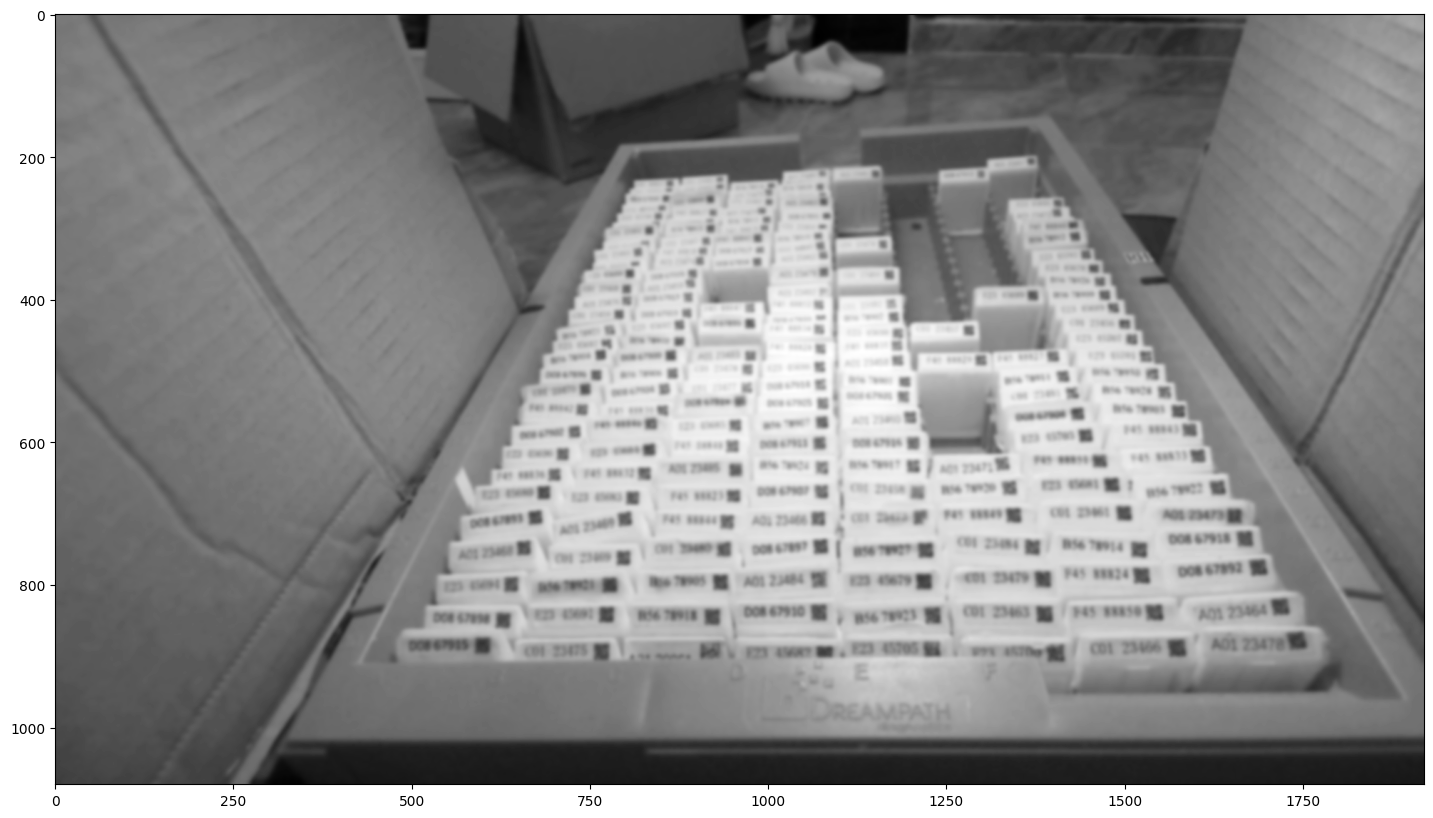

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('../images/img1.jpg', 0)

# Blur the image
blur = cv2.GaussianBlur(img, (15, 15), 0)

#plot blurred image
plt.figure(figsize=(20, 10))
plt.imshow(blur, 'gray')


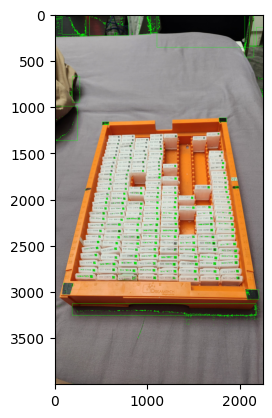

In [56]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# HSV에서 검은색을 나타내는 범위를 정의합니다.
lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 40])

# HSV 이미지에서 검은색을 검출하기 위한 마스크를 생성합니다.
mask = cv2.inRange(hsv, lower_black, upper_black)

# 마스크를 적용하여 검은색 영역만을 가진 이미지를 얻습니다.
res = cv2.bitwise_and(blur, blur, mask=mask)

# 이진화된 이미지에서 외곽선을 찾습니다.
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 검은색 영역에 사각형을 그립니다.
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(blur, (x, y), (x + w, y + h), (0, 255, 0), 2)

# BGR 색상 공간을 RGB로 변환합니다.
image = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

# 이미지를 출력합니다.
plt.imshow(image)
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x181ae348f10>)

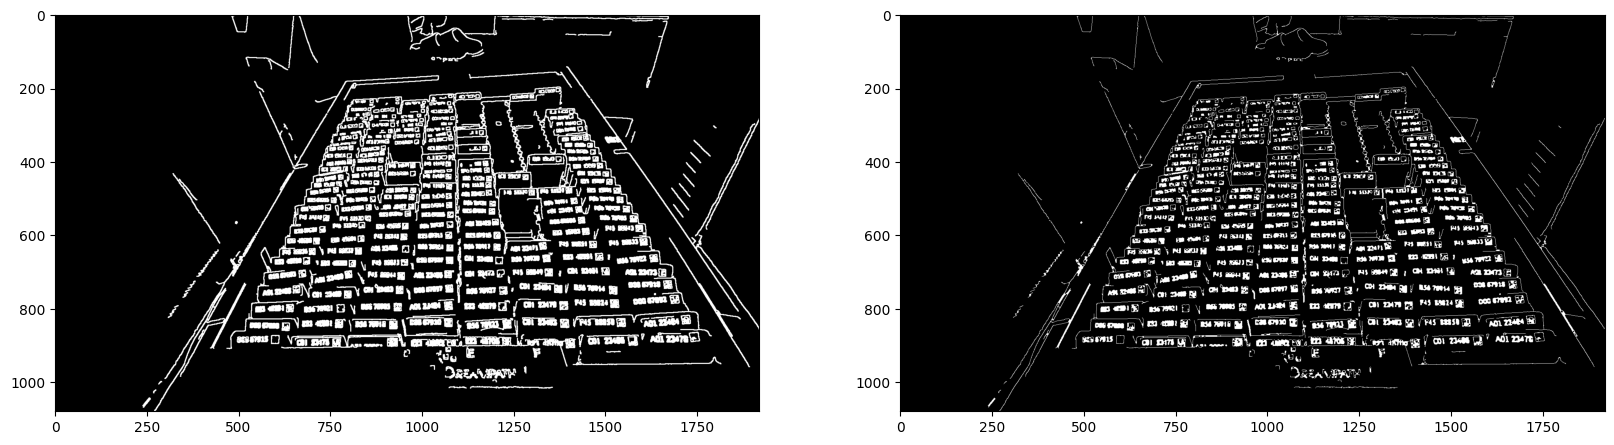

In [47]:
# Dilation
kernel1 = np.ones((3,3),np.uint8)
dilation = cv2.dilate(edges,kernel1,iterations = 1)

# Erosion
erosion = cv2.erode(dilation,kernel1,iterations = 1)

#plot dilation and eroded images use subplot
plt.figure(figsize=(20, 12))
plt.subplot(1, 2, 1), plt.imshow(dilation, 'gray')
plt.subplot(1, 2, 2), plt.imshow(erosion, 'gray')

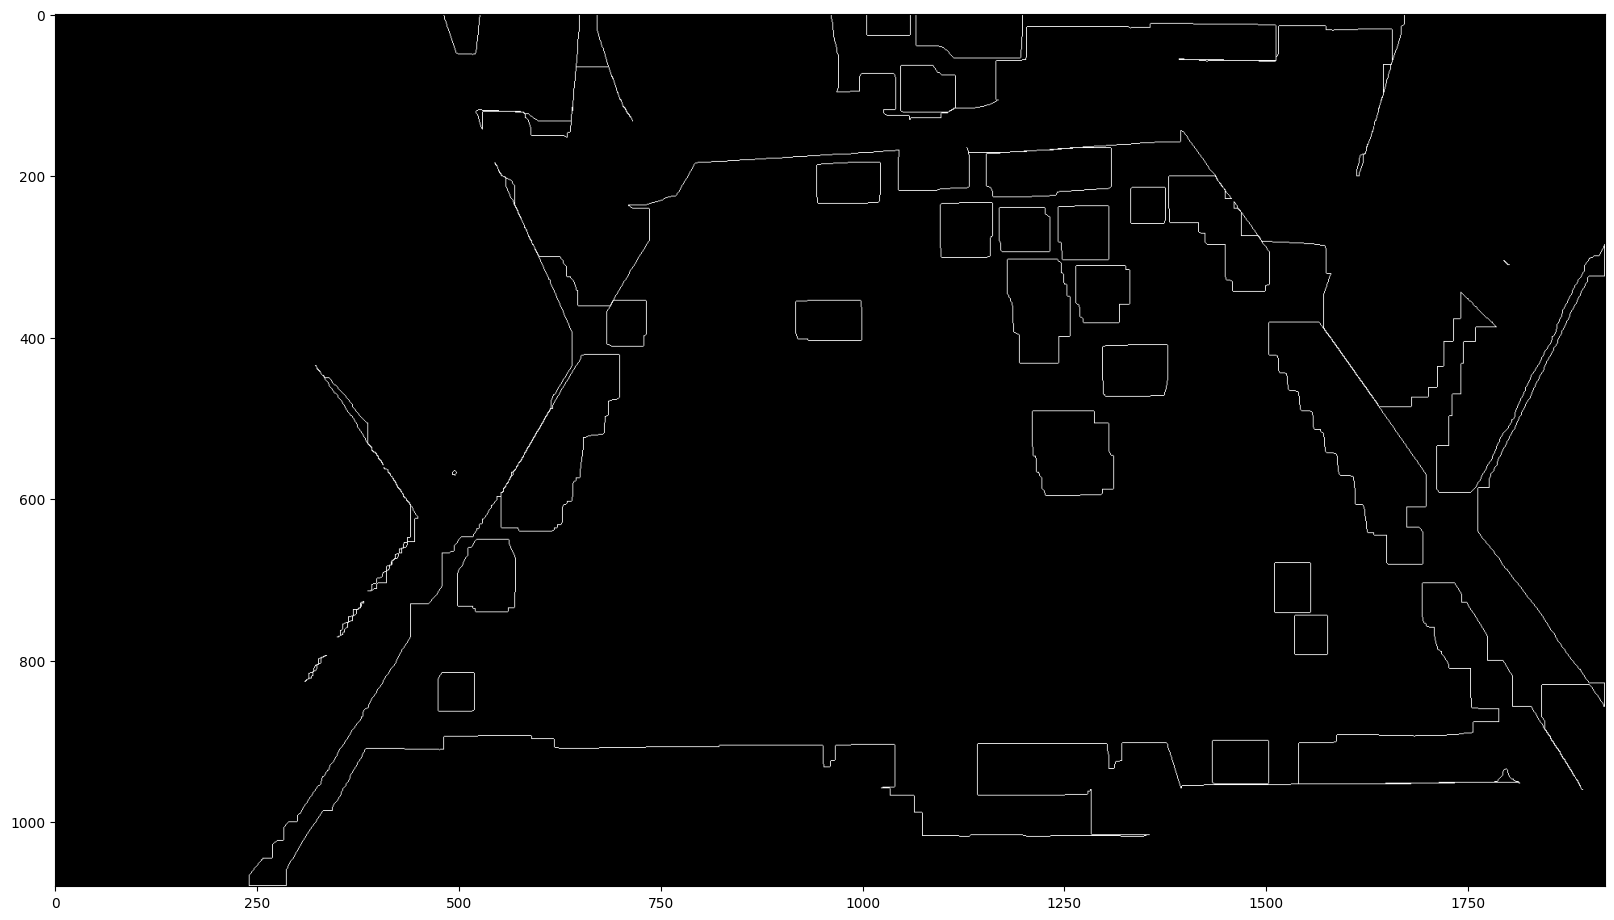

In [36]:
# Find contours
contours, _ = cv2.findContours(erosion, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to store the contours
img_contours = np.zeros(img.shape)

# Draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)
#plot contours
plt.figure(figsize=(20, 12))
plt.imshow(img_contours, 'gray')

In [10]:
print(contours)
print(len(contours))

(array([[[ 256, 1044]],

       [[ 256, 1045]],

       [[ 255, 1046]],

       [[ 254, 1046]],

       [[ 254, 1047]],

       [[ 250, 1051]],

       [[ 250, 1052]],

       [[ 245, 1057]],

       [[ 245, 1058]],

       [[ 242, 1061]],

       [[ 242, 1062]],

       [[ 239, 1065]],

       [[ 240, 1066]],

       [[ 240, 1069]],

       [[ 241, 1069]],

       [[ 242, 1068]],

       [[ 242, 1067]],

       [[ 245, 1064]],

       [[ 245, 1063]],

       [[ 251, 1057]],

       [[ 251, 1056]],

       [[ 255, 1052]],

       [[ 255, 1051]],

       [[ 259, 1047]],

       [[ 259, 1046]],

       [[ 257, 1044]]], dtype=int32), array([[[1184,  966]],

       [[1182,  968]],

       [[1182,  969]],

       [[1183,  970]],

       [[1183,  983]],

       [[1188,  983]],

       [[1188,  982]],

       [[1189,  981]],

       [[1197,  981]],

       [[1198,  982]],

       [[1198,  989]],

       [[1200,  989]],

       [[1201,  990]],

       [[1202,  989]],

       [[1202,  988]],

 